# chapter 2.2

In [ ]:
import pandas as pd
import numpy as np
import torch

## 1. Try loading datasets, e.g., Abalone from the UCI Machine Learning Repository and inspect their properties. What fraction of them has missing values? What fraction of the variables is numerical, categorical, or text?

	Sex		nominal			M, F, and I (infant)
	Length		continuous	mm	Longest shell measurement
	Diameter	continuous	mm	perpendicular to length
	Height		continuous	mm	with meat in shell
	Whole weight	continuous	grams	whole abalone
	Shucked weight	continuous	grams	weight of meat
	Viscera weight	continuous	grams	gut weight (after bleeding)
	Shell weight	continuous	grams	after being dried
	Rings		integer			+1.5 gives the age in years

In [3]:
col_names = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
aba = pd.read_csv('../data/abalone/abalone.data',sep=',',header=None,names=col_names)
aba

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
aba.shape

(4177, 9)

In [5]:
aba.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

there is no missing values in this dataframe

In [11]:
print(aba.dtypes)
print(aba.dtypes.value_counts())

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object
float64    7
object     1
int64      1
dtype: int64


1. numerical variables: 8/9
2. categorical : 1/9
3. text: 0

## 2. Try indexing and selecting data columns by name rather than by column number. The pandas documentation on indexing has further details on how to do this.

e.g. select the column 'Diameter'

In [12]:
aba['Diameter']

0       0.365
1       0.265
2       0.420
3       0.365
4       0.255
        ...  
4172    0.450
4173    0.440
4174    0.475
4175    0.485
4176    0.555
Name: Diameter, Length: 4177, dtype: float64

## 3. How large a dataset do you think you could load this way? What might be the limitations? Hint: consider the time to read the data, representation, processing, and memory footprint. Try this out on your laptop. What happens if you try it out on a server?

1. It depends mainly on: the available RAM, the data representation, and how to load it (by pandas or numpy)
2. limitations: 

2.1. memory footprint: when loading a file, it is expaned in memory. one can easily run out of RAM

2.2. read time: reading large text files is slow due to parsing overhead, binary formats (e.g. npy, parquet) are much faster

2.3. processing time: operations like joins, filters, or group-bys scale roughly linearly with data size

2.4. representation: text files are inefficient, they store numbers as ASCII strings, binary formats are compact and faster

2.5. I/O bandwidth: disk read speed limits how fast one can load the file (HDD/SSD)

3. laptops can freeze or swap memory, servers can handle larger data but may still hit per-user memory quotas

## 4. How would you deal with data that has a very large number of categories? What if the category labels are all unique? Should you include the latter?

1. target encoding
2. embedding: learn dense vector representations for catagories


if some features like `user_id`, `order_id`, that every row has a distinct value, we should exclude these columns, because these features don't generalize and carry no useful pattern

## 5. What alternatives to pandas can you think of? How about loading NumPy tensors from a file? Check out Pillow, the Python Imaging Library.

1. numpy: numerical arrays and tensors
2. polars: a fast dataframe library in rust
3. dask: parallel/distributed dataframe, if datasets too large to fit in memory
4. vaex: lazy, memory-mapped dataframe, if dataset is very large 
5. pyarrow: columnar memory format
6. cudf: gpu-accerlerated dataframe, for very large data on nvidia gpus

In [15]:
from PIL import Image
img = Image.open('../data/theshire.jpg')
img_arr = np.array(img) # convert to numpy array (H * W * C)


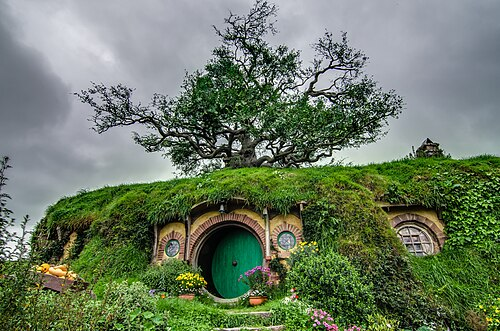

In [14]:
img

In [16]:
print(img_arr.shape)

(331, 500, 3)


# chapter 2.3: linear algebra

In [2]:
import torch

## 1. Prove that the transpose of the transpose of a matrix is the matrix itself: 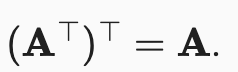

A = (aij) is a m * n matrix

(AT)ij = aji

ATT = A

## 2. Given two matrices and , show that sum and transposition commute: 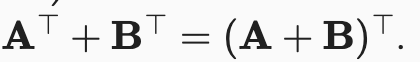

Aij = aij

Bij = bij

ATij = aji

BTij = bji

ATij + BTij = aji + bji

(A + B)T = aji + bji

## 3. 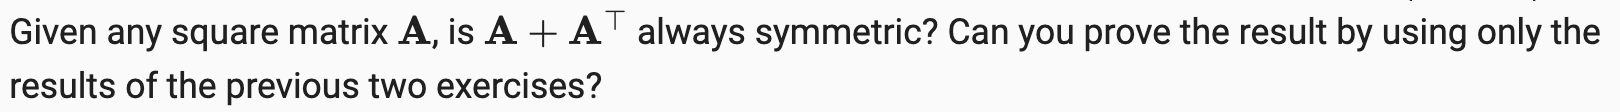

Aij = aij

ATij = aji

(A+AT)ij = aij + aji

(A+AT)Tij = aji + aij

A+AT = (A+AT)T

so A + AT is always symmetric

## 4. We defined the tensor X of shape (2, 3, 4) in this section. What is the output of len(X)? Write your answer without implementing any code, then check your answer using code.

len(X) should be 2

In [3]:
X = torch.zeros((2,3,4))
print(len(X))

2


## 5. For a tensor X of arbitrary shape, does len(X) always correspond to the length of a certain axis of X? What is that axis?

len(X) is always correspond to the length of a certain axis, that is the first axis

## 6. Run A / A.sum(axis=1) and see what happens. Can you analyze the results?

it would give me the matrix that A is divided by the sum of the rows. now the sum of each row is 1

## 7. When traveling between two points in downtown Manhattan, what is the distance that you need to cover in terms of the coordinates, i.e., in terms of avenues and streets? Can you travel diagonally?

manhattan distance is the sum of all the elements. which is the sum of all the avenus and streets

cannnot be the diagonally, that is euclidean distance

## 8. Consider a tensor of shape (2, 3, 4). What are the shapes of the summation outputs along axes 0, 1, and 2?

axis 0: 3, 4

axis 1: 2, 4 

axis 2. 2, 3

## 9. Feed a tensor with three or more axes to the linalg.norm function and observe its output. What does this function compute for tensors of arbitrary shape?

it computes the vector or matrix norm, a measure of the 'magnitude' or 'length' of a tensor. it generalizes the familiar l2 norm to higher dimemsions

In [10]:
A = torch.ones(3,4)

In [11]:
torch.linalg.norm(A)

tensor(3.4641)

10. 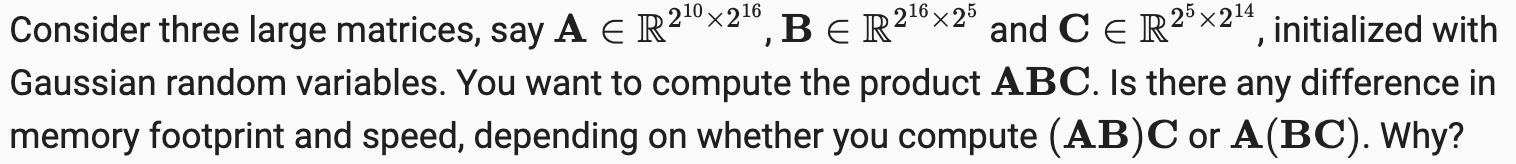

1. (AB)C: 2^16 * 2^5 * 2^10 + 2^5 * 2^14 * 2^10

2. A(BC): 2^5 * 2^14 * 2^16 + 2^16 * 2^14 * 2^10

In [13]:
(2^16) * (2^5) * (2^10) + (2^5) * (2^14) * (2^10)

1680

In [14]:
(2^5) * (2^14) * (2^16 )+( 2^16) * (2^14) * (2^10) 

3240

1. AB shape is smaller than BC
2. there are less ops in AB * C than A* BC


11. 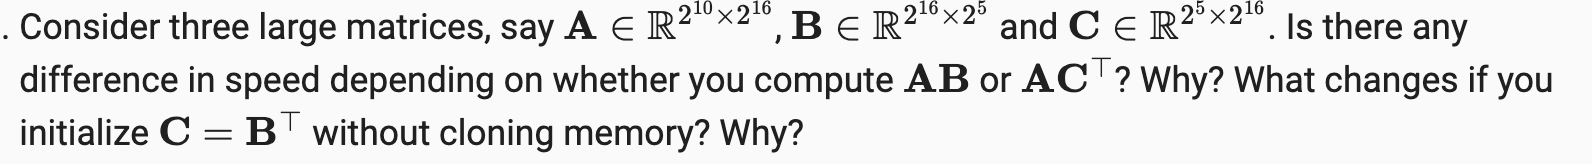

1. in theory the compute is identical

2. but AB is faster than ACT. If the framework materializes CT, we need to pay an extra memory pass of 2^16*2^5 elements and possibly an extra kernel on GPU

3. If 

In [19]:
A = torch.ones(2**10,2**16)
B = torch.ones(2**16,2**5)
C = torch.ones(2**5,2**16)

In [20]:
A @ B

tensor([[65536., 65536., 65536.,  ..., 65536., 65536., 65536.],
        [65536., 65536., 65536.,  ..., 65536., 65536., 65536.],
        [65536., 65536., 65536.,  ..., 65536., 65536., 65536.],
        ...,
        [65536., 65536., 65536.,  ..., 65536., 65536., 65536.],
        [65536., 65536., 65536.,  ..., 65536., 65536., 65536.],
        [65536., 65536., 65536.,  ..., 65536., 65536., 65536.]])

In [23]:
A@(C.T)

tensor([[65536., 65536., 65536.,  ..., 65536., 65536., 65536.],
        [65536., 65536., 65536.,  ..., 65536., 65536., 65536.],
        [65536., 65536., 65536.,  ..., 65536., 65536., 65536.],
        ...,
        [65536., 65536., 65536.,  ..., 65536., 65536., 65536.],
        [65536., 65536., 65536.,  ..., 65536., 65536., 65536.],
        [65536., 65536., 65536.,  ..., 65536., 65536., 65536.]])

In [24]:
C = B.T.clone()

In [25]:
A@(C.T)

tensor([[65536., 65536., 65536.,  ..., 65536., 65536., 65536.],
        [65536., 65536., 65536.,  ..., 65536., 65536., 65536.],
        [65536., 65536., 65536.,  ..., 65536., 65536., 65536.],
        ...,
        [65536., 65536., 65536.,  ..., 65536., 65536., 65536.],
        [65536., 65536., 65536.,  ..., 65536., 65536., 65536.],
        [65536., 65536., 65536.,  ..., 65536., 65536., 65536.]])

12. 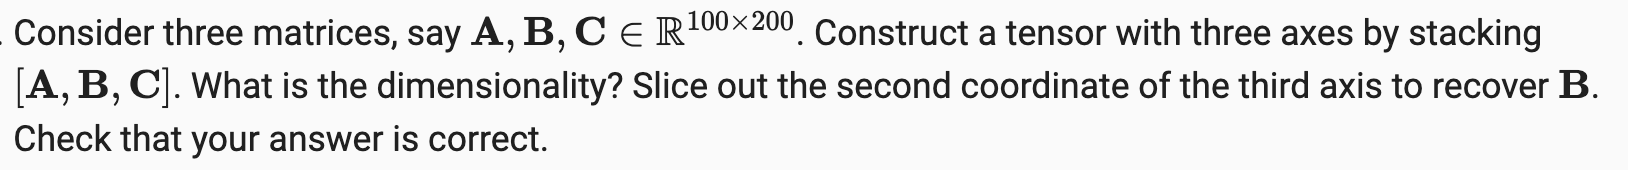

shape is (3,100,200)

In [28]:
A = torch.ones(100,200)
B = torch.ones(100,200)
C = torch.ones(100,200)

In [29]:
T = torch.stack([A,B,C],dim=0)
B_recovered = T[1,:,:]

In [30]:
torch.allclose(B,B_recovered)

True